In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
(X_train, y_train),(X_test, y_test)= keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


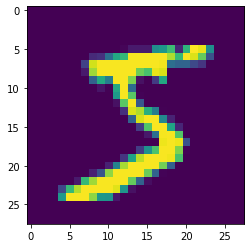

In [6]:
plt.imshow(X_train[0])
print(y_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()


In [9]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1,validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0013 - acc: 0.9995 - val_loss: 0.1052 - val_acc: 0.9900
Epoch 2/15
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0010 - acc: 0.9997 - val_loss: 0.1018 - val_acc: 0.9904
Epoch 3/15
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0015 - acc: 0.9996 - val_loss: 0.1107 - val_acc: 0.9876
Epoch 4/15
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.1544 - val_acc: 0.9857
Epoch 5/15
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0019 - acc: 0.9995 - val_loss: 0.1204 - val_acc: 0.9877
Epoch 6/15
48000/48000 [==============================] - 5s 94us/sample - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1070 - val_acc: 0.9883
Epoch 7/15
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0011 - acc: 0.9997 - val_loss: 0.

In [29]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.2037 - acc: 0.9803


[0.20373226120766422, 0.9803]

In [30]:
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
y_test[0]

7

In [32]:
y_test[1]

2

In [33]:
y_test[2]

1

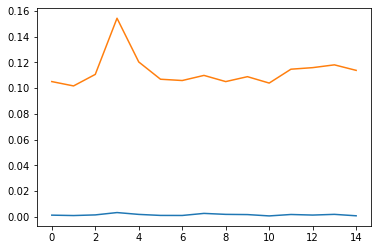

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

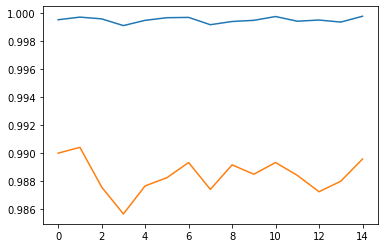

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])